<a href="https://colab.research.google.com/github/kmonroyzm/kmonroyzm/blob/main/Regresion_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 9/Actividad9_RLog"
os.chdir(DIR)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_df = pd.read_csv('data.csv')
data_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
data_df.set_index('id', inplace=True)

In [ ]:
data_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
data_df.describe(include='object')

,diagnosis
count,569
unique,2
top,B
freq,357


In [ ]:
data_df.nunique()

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

In [ ]:
data_df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

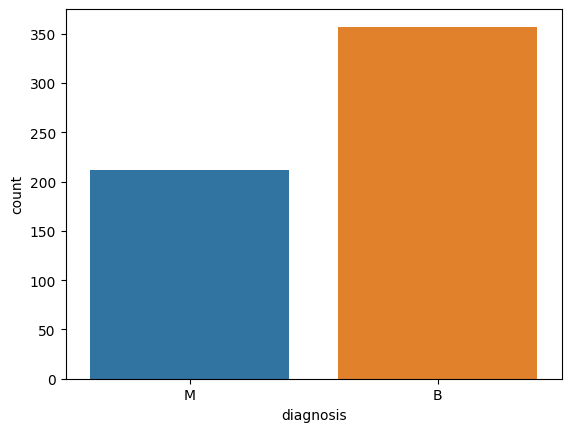

In [ ]:
sns.countplot(x=data_df['diagnosis'])

Como hay tres valores relacionados con la misma característica (`mean`, `se` y `worst`) es muy probable que exista multicolinealidad en el conjunto.

La multicolinealidad en regresión es una condición que ocurre cuando algunas variables predictoras están fuertemente correlacionadas entre sí, de tal manera que si se incluyen simultáneamente en un modelo, impiden explicar de manera correcta el efecto que cada una tiene sobre la variable respuesta. Existen muchas formas de analizar si hay colinealidad en los modelos, una de ellas es el alto coeficiente de correlación entre variables.

Para observar este efecto, elabora un mapa de calor que cuantifique la correlación de las variables numéricas en el dataframe.

<Axes: >

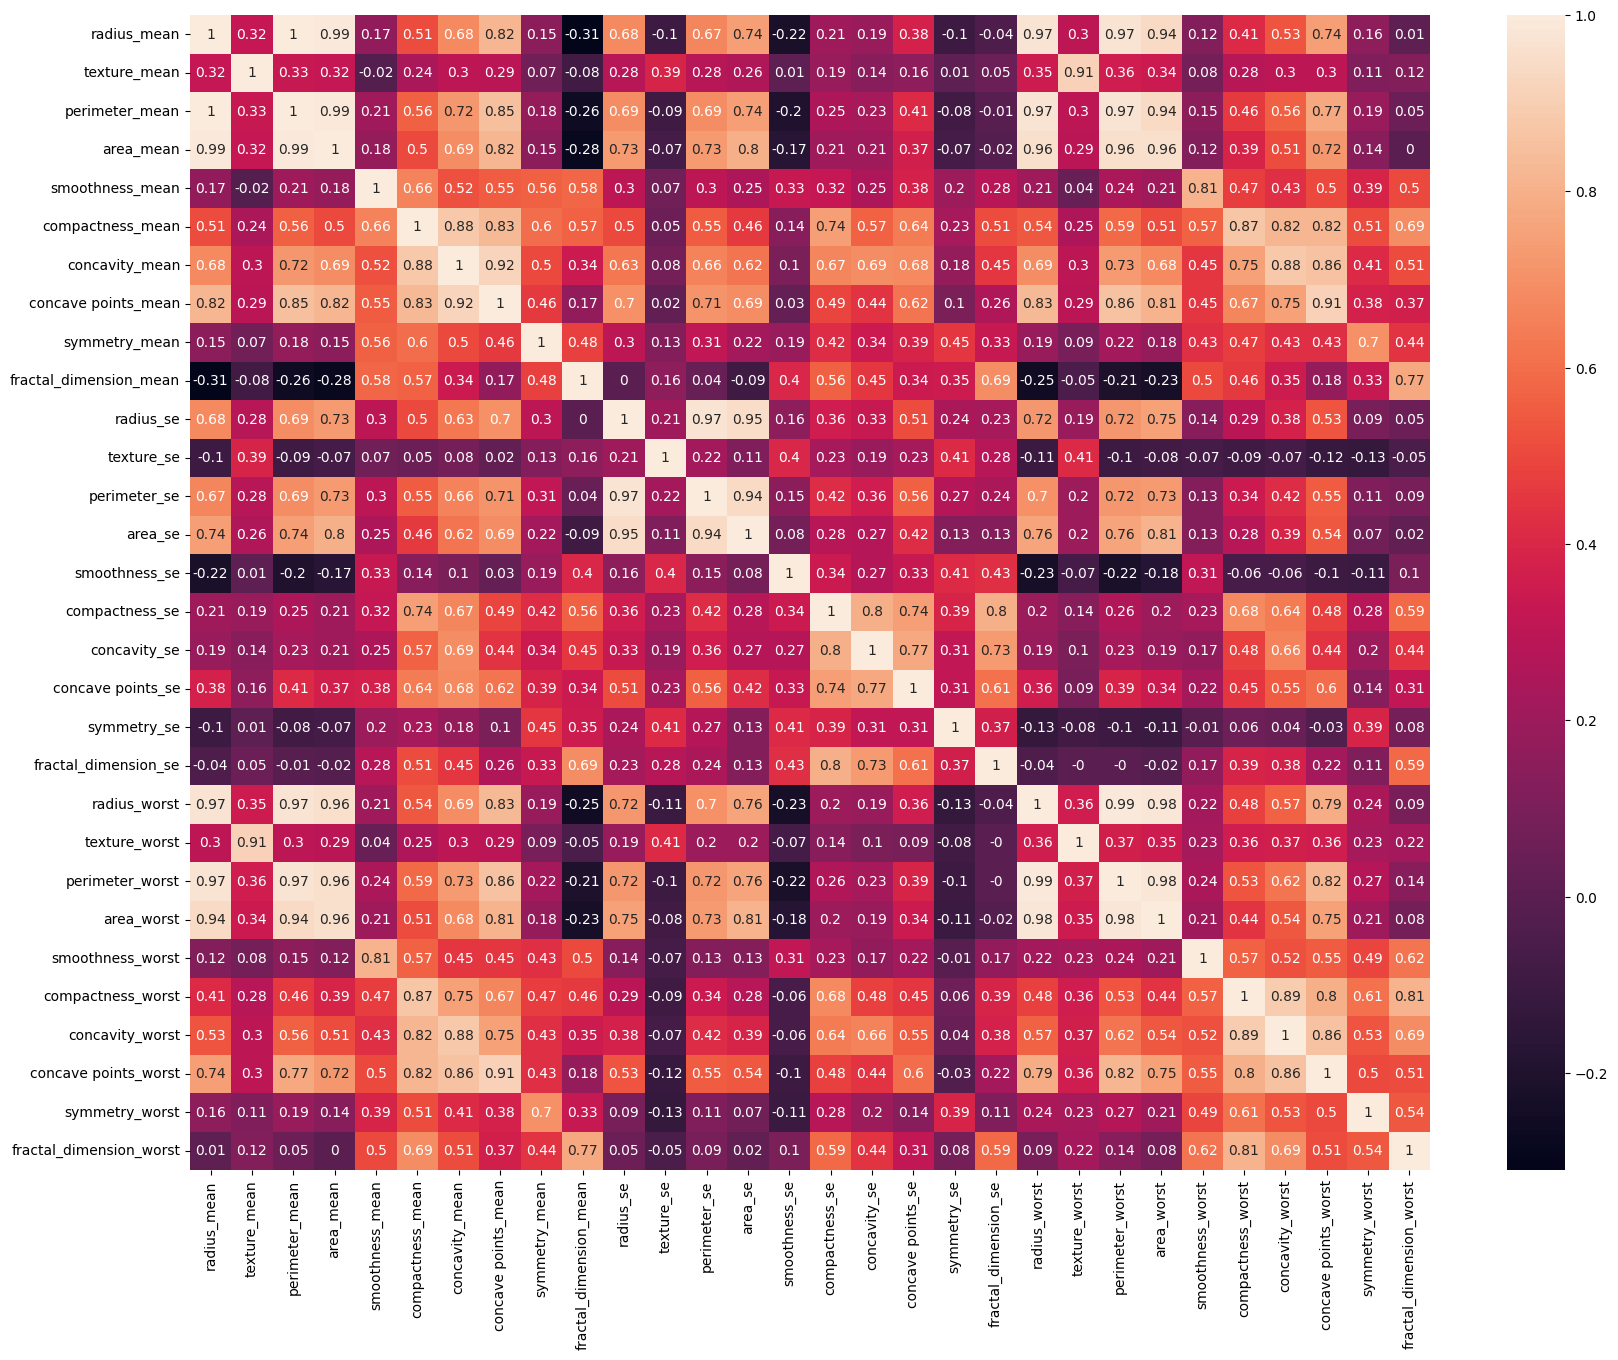

In [ ]:
correlation = data_df.corr(numeric_only=True)
plt.rcParams['figure.figsize'] = (20, 15)
sns.heatmap(round(correlation,2), annot=True)

Si te fijas en los valores de correlación entre las variables `_mean` y `_worst` es evidente la multicolinearidad.

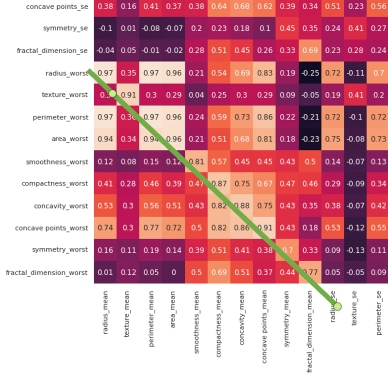

Por ejemplo, la columna `radius_mean` tiene una correlación de 0.97 con la columna `radius_worst`. Esto es algo inevitable, porque las columnas "peores" son esencialmente solo un subconjunto de las columnas "medias".

Para solucionar el problema numérico de la multicolinealidad, tradicionalmente se recurre a eliminar variables o efectuar análisis de componentes principales (PCA) con las `X`’s y usar los componentes como variables independientes en un modelo final.

Conduciremos esta actividad en esos dos sentidos.


In [ ]:
x = data_df.filter(like='_worst', axis=1)
data_df.drop(x.columns, inplace=True, axis=1)

In [ ]:
data_df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')



```Python
sns.pairplot(data=data_df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']])
```




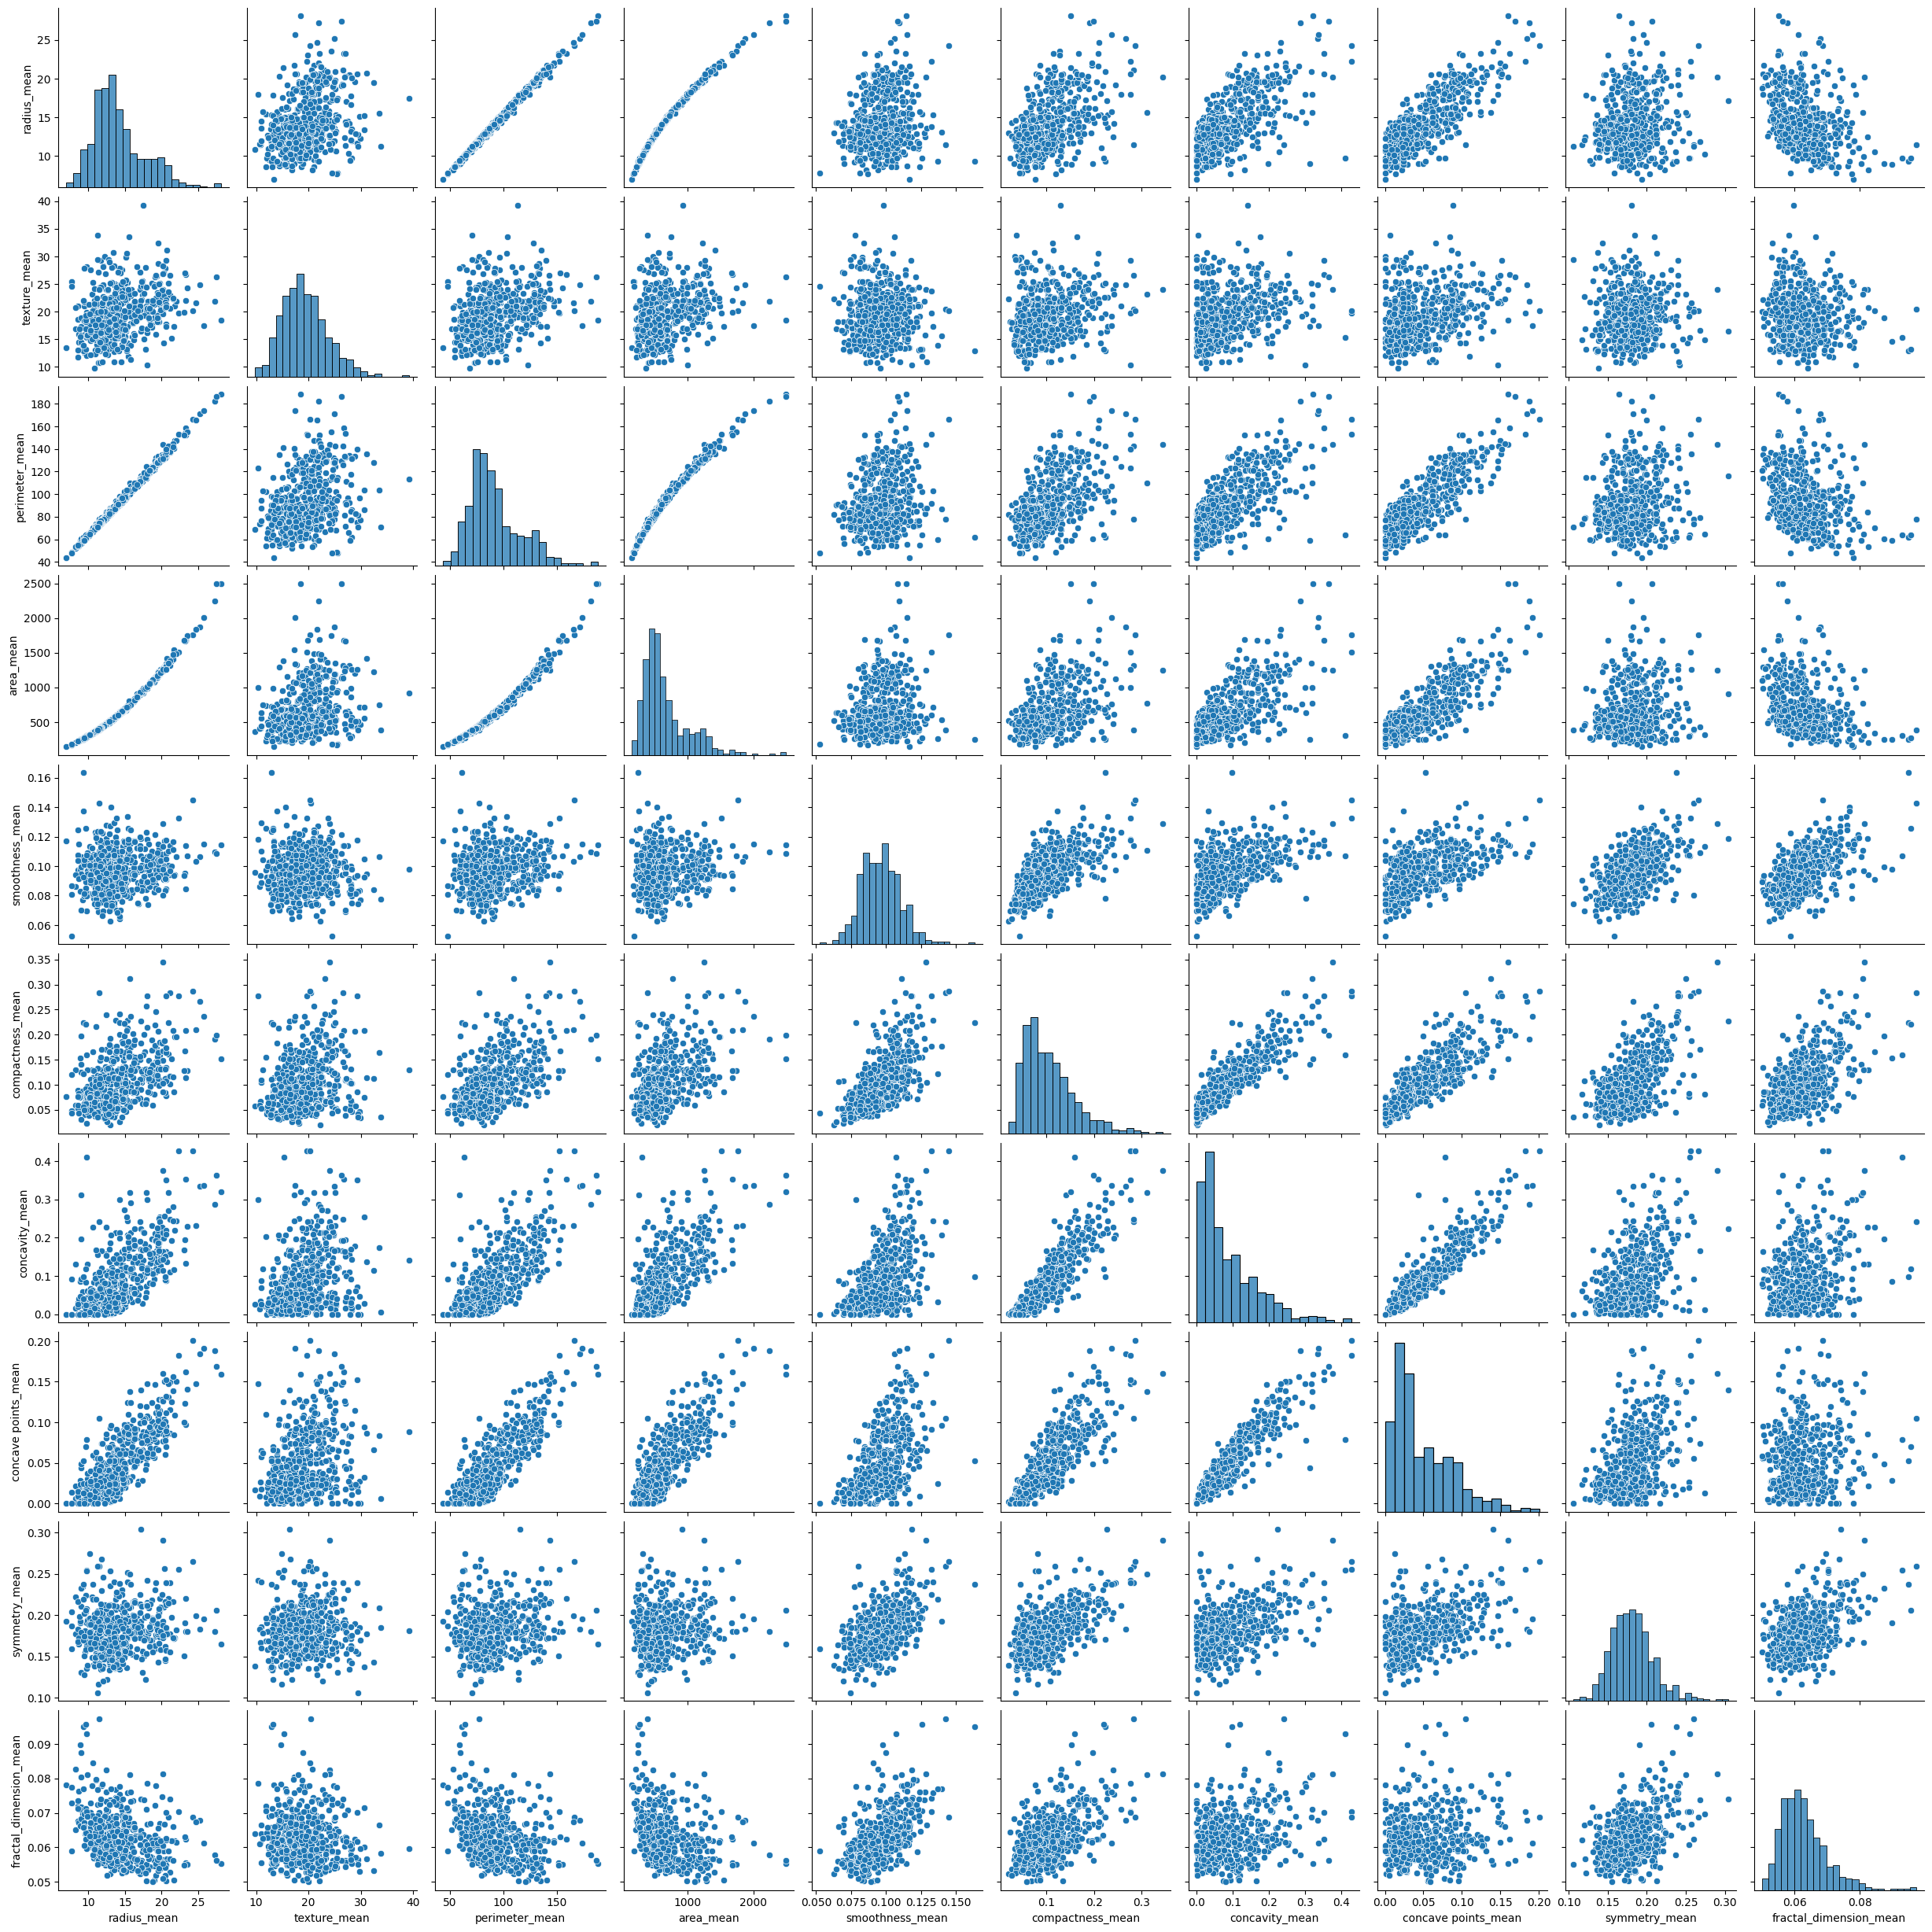

In [ ]:
sns.pairplot(data=data_df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']])

De la matriz podrás observar relaciones lineales bastante evidentes entre:


*   `radius_mean`, `perimeter_mean` y `area_mean`
*   `compactness_mean`, `concavity_mean`, `concave_points_mean`

Sabemos que el perímetro y el área de un círculo, se calculan a partir del radio. Entonces, la relación entre las primeras tres variables es muy clara para nosotros.

<Axes: >

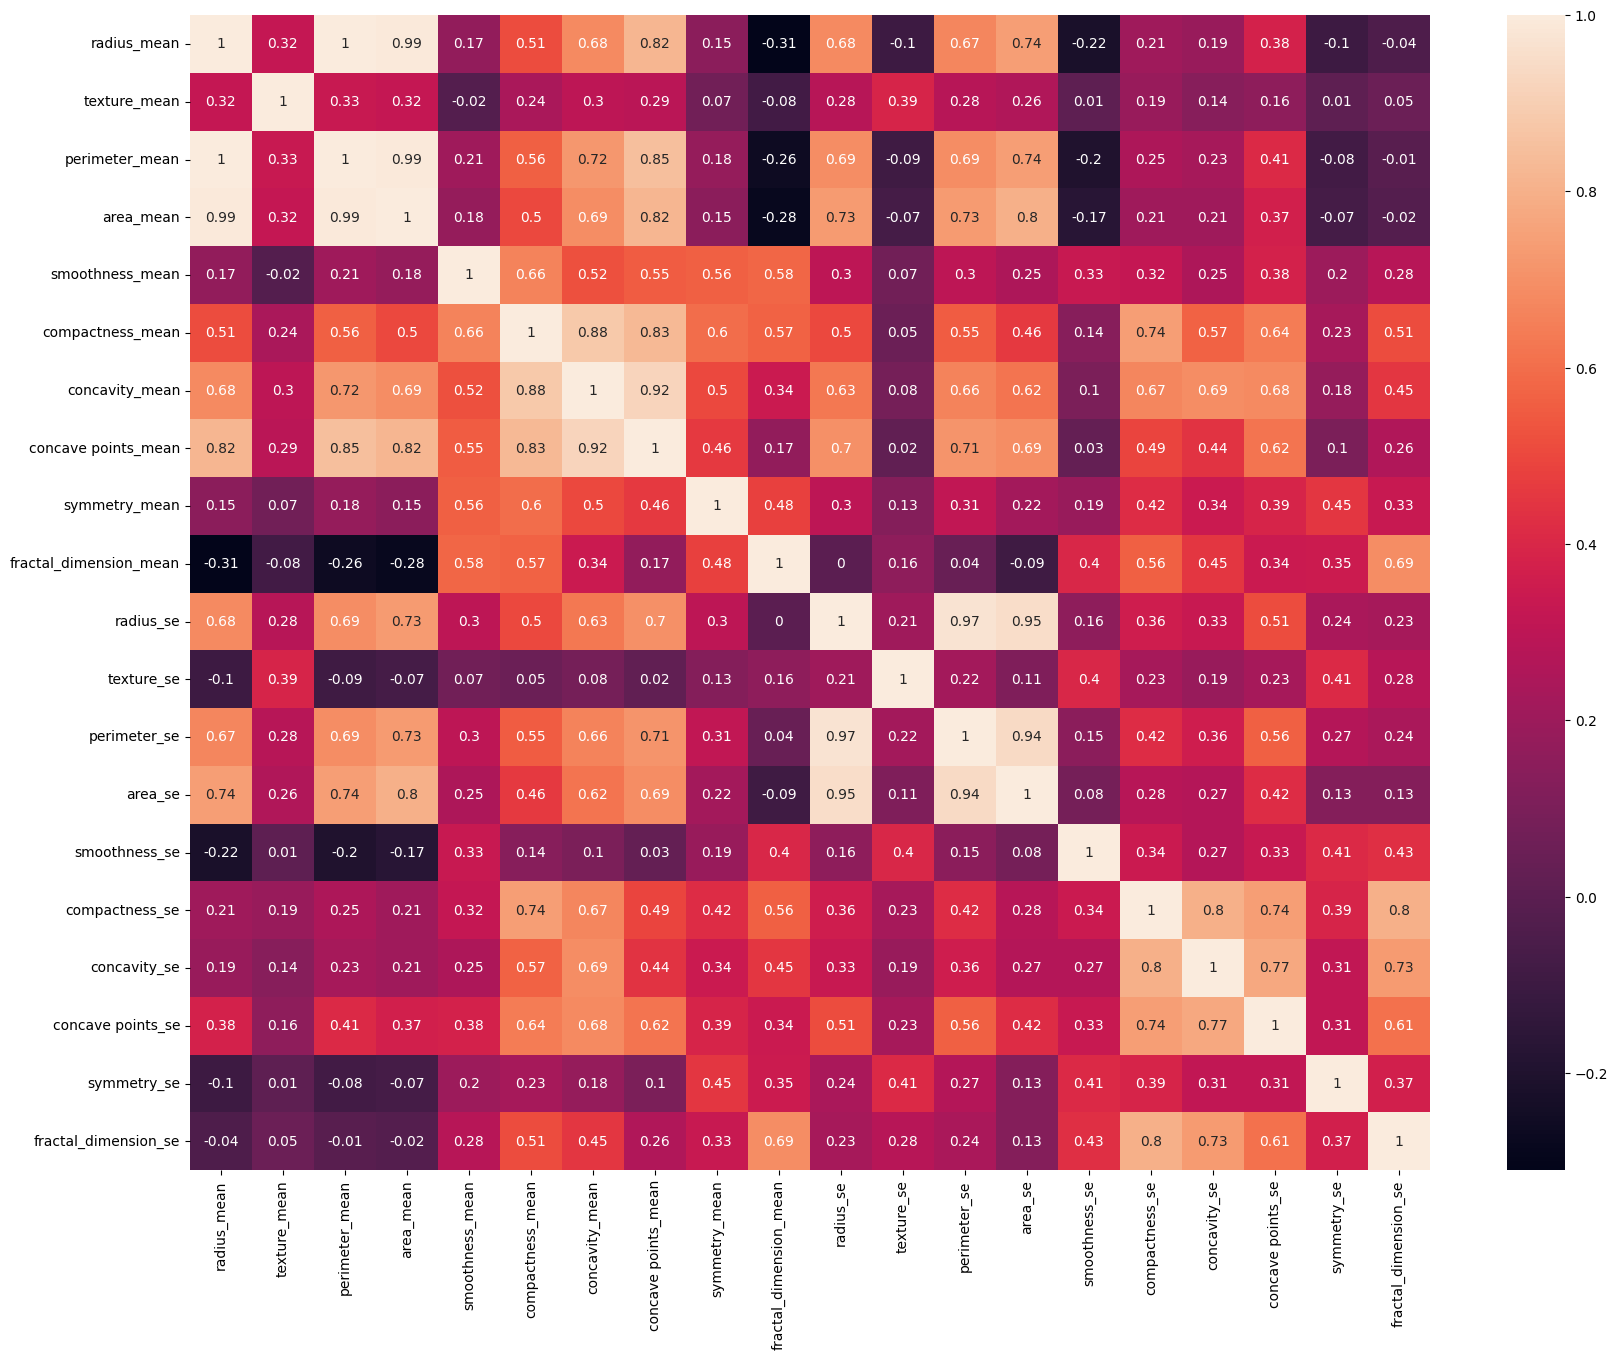

In [ ]:
correlation = data_df.corr(numeric_only=True)
plt.rcParams['figure.figsize'] = (20, 15)
sns.heatmap(round(correlation,2), annot=True)

In [ ]:
data_df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')

In [ ]:
data_df[['diagnosis','radius_mean', 'compactness_mean', 'radius_se', 'compactness_se']]

,diagnosis,radius_mean,compactness_mean,radius_se,compactness_se
id,,,,,
842302,M,17.99,0.27760,1.0950,0.04904
842517,M,20.57,0.07864,0.5435,0.01308
84300903,M,19.69,0.15990,0.7456,0.04006
84348301,M,11.42,0.28390,0.4956,0.07458
84358402,M,20.29,0.13280,0.7572,0.02461
...,...,...,...,...,...
926424,M,21.56,0.11590,1.1760,0.02891
926682,M,20.13,0.10340,0.7655,0.02423
926954,M,16.60,0.10230,0.4564,0.03731


In [ ]:
columns_to_keep = ['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean',
                   'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se']
columns_to_drop = [col for col in data_df.columns if col not in columns_to_keep]
filtered_df = data_df.drop(columns=columns_to_drop)
filtered_df

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,compactness_se,concavity_se,concave points_se
id,,,,,,,,,,,,
842302,17.99,122.80,1001.0,0.27760,0.30010,0.14710,1.0950,8.589,153.40,0.04904,0.05373,0.01587
842517,20.57,132.90,1326.0,0.07864,0.08690,0.07017,0.5435,3.398,74.08,0.01308,0.01860,0.01340
84300903,19.69,130.00,1203.0,0.15990,0.19740,0.12790,0.7456,4.585,94.03,0.04006,0.03832,0.02058
84348301,11.42,77.58,386.1,0.28390,0.24140,0.10520,0.4956,3.445,27.23,0.07458,0.05661,0.01867
84358402,20.29,135.10,1297.0,0.13280,0.19800,0.10430,0.7572,5.438,94.44,0.02461,0.05688,0.01885
...,...,...,...,...,...,...,...,...,...,...,...,...
926424,21.56,142.00,1479.0,0.11590,0.24390,0.13890,1.1760,7.673,158.70,0.02891,0.05198,0.02454
926682,20.13,131.20,1261.0,0.10340,0.14400,0.09791,0.7655,5.203,99.04,0.02423,0.03950,0.01678
926954,16.60,108.30,858.1,0.10230,0.09251,0.05302,0.4564,3.425,48.55,0.03731,0.04730,0.01557


array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>],
       [<Axes: title={'center': 'radius_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>],
       [<Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>,
        <Axes: title={'center': 'concave points_se'}>]], dtype=object)

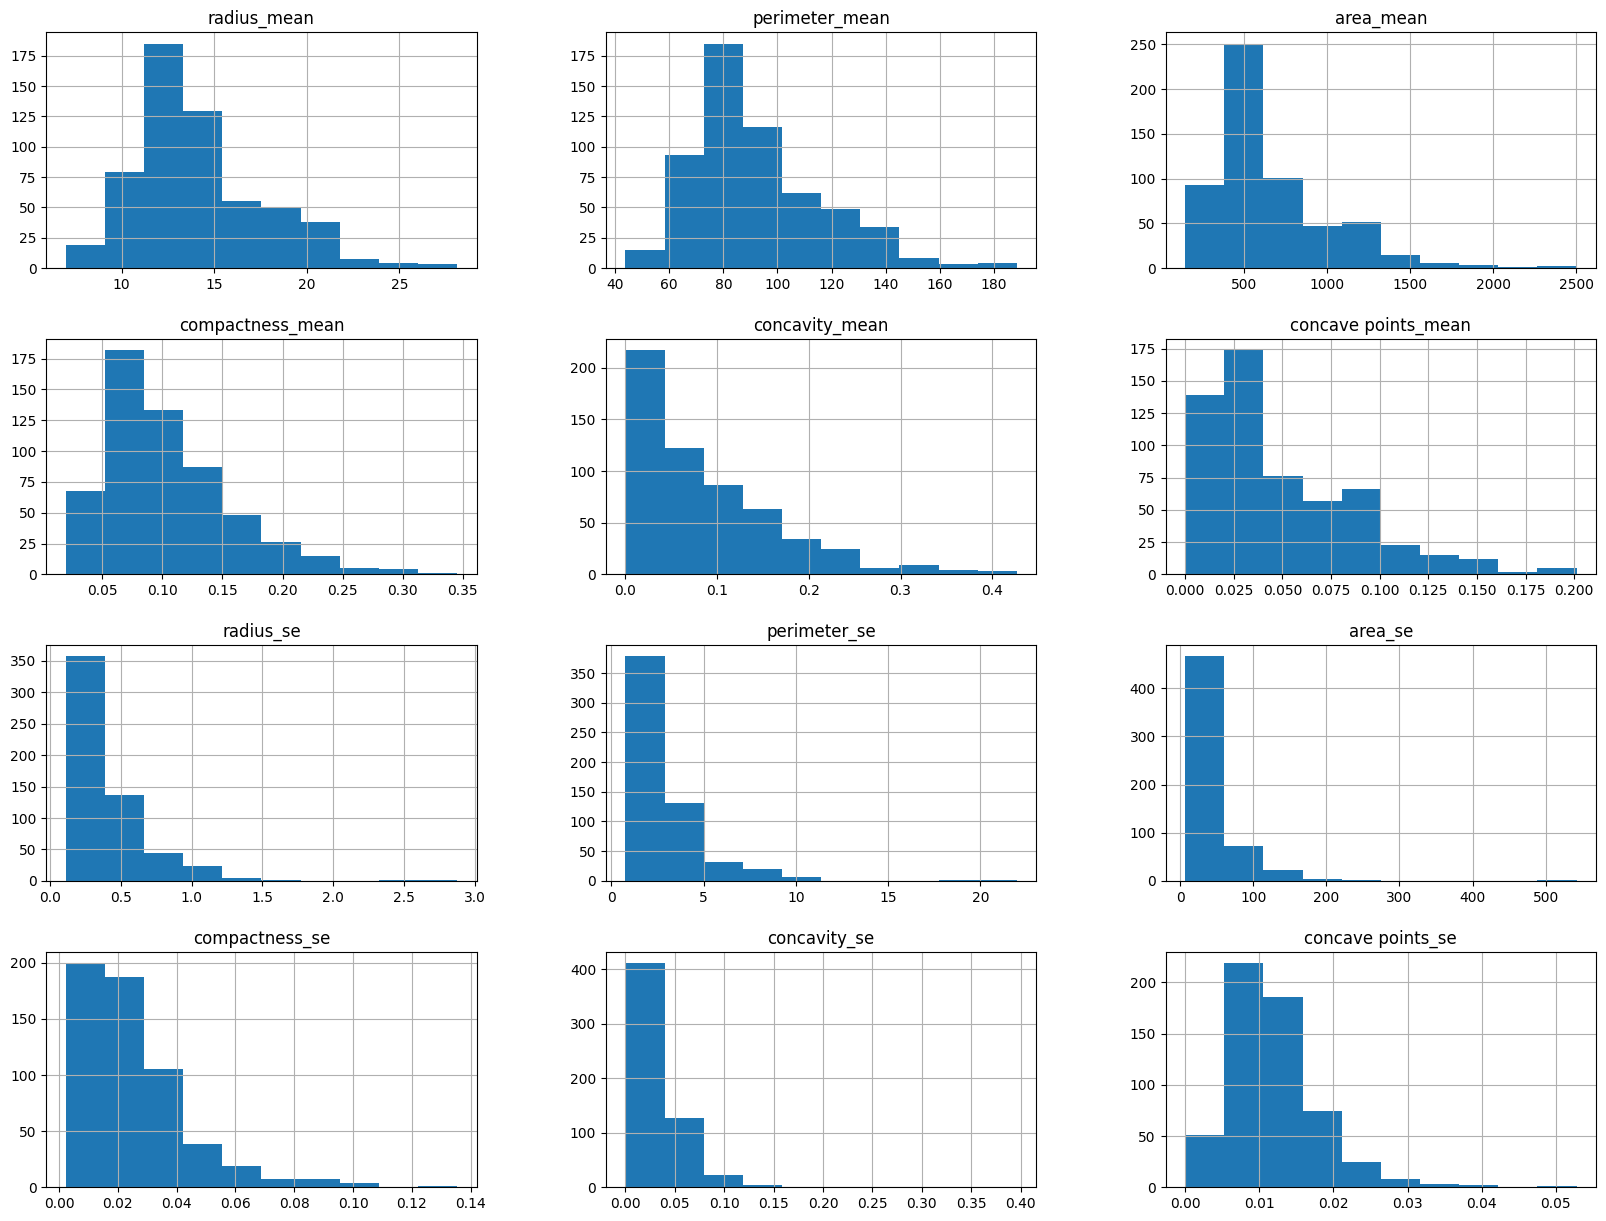

In [ ]:
filtered_df.hist()

In [ ]:
from scipy.stats import skew
skewness = filtered_df.apply(lambda x: skew(x))

In [ ]:
skew_cols = skewness[skewness > 1].index.tolist()
skew_cols

['area_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'compactness_se',
 'concavity_se',
 'concave points_se']

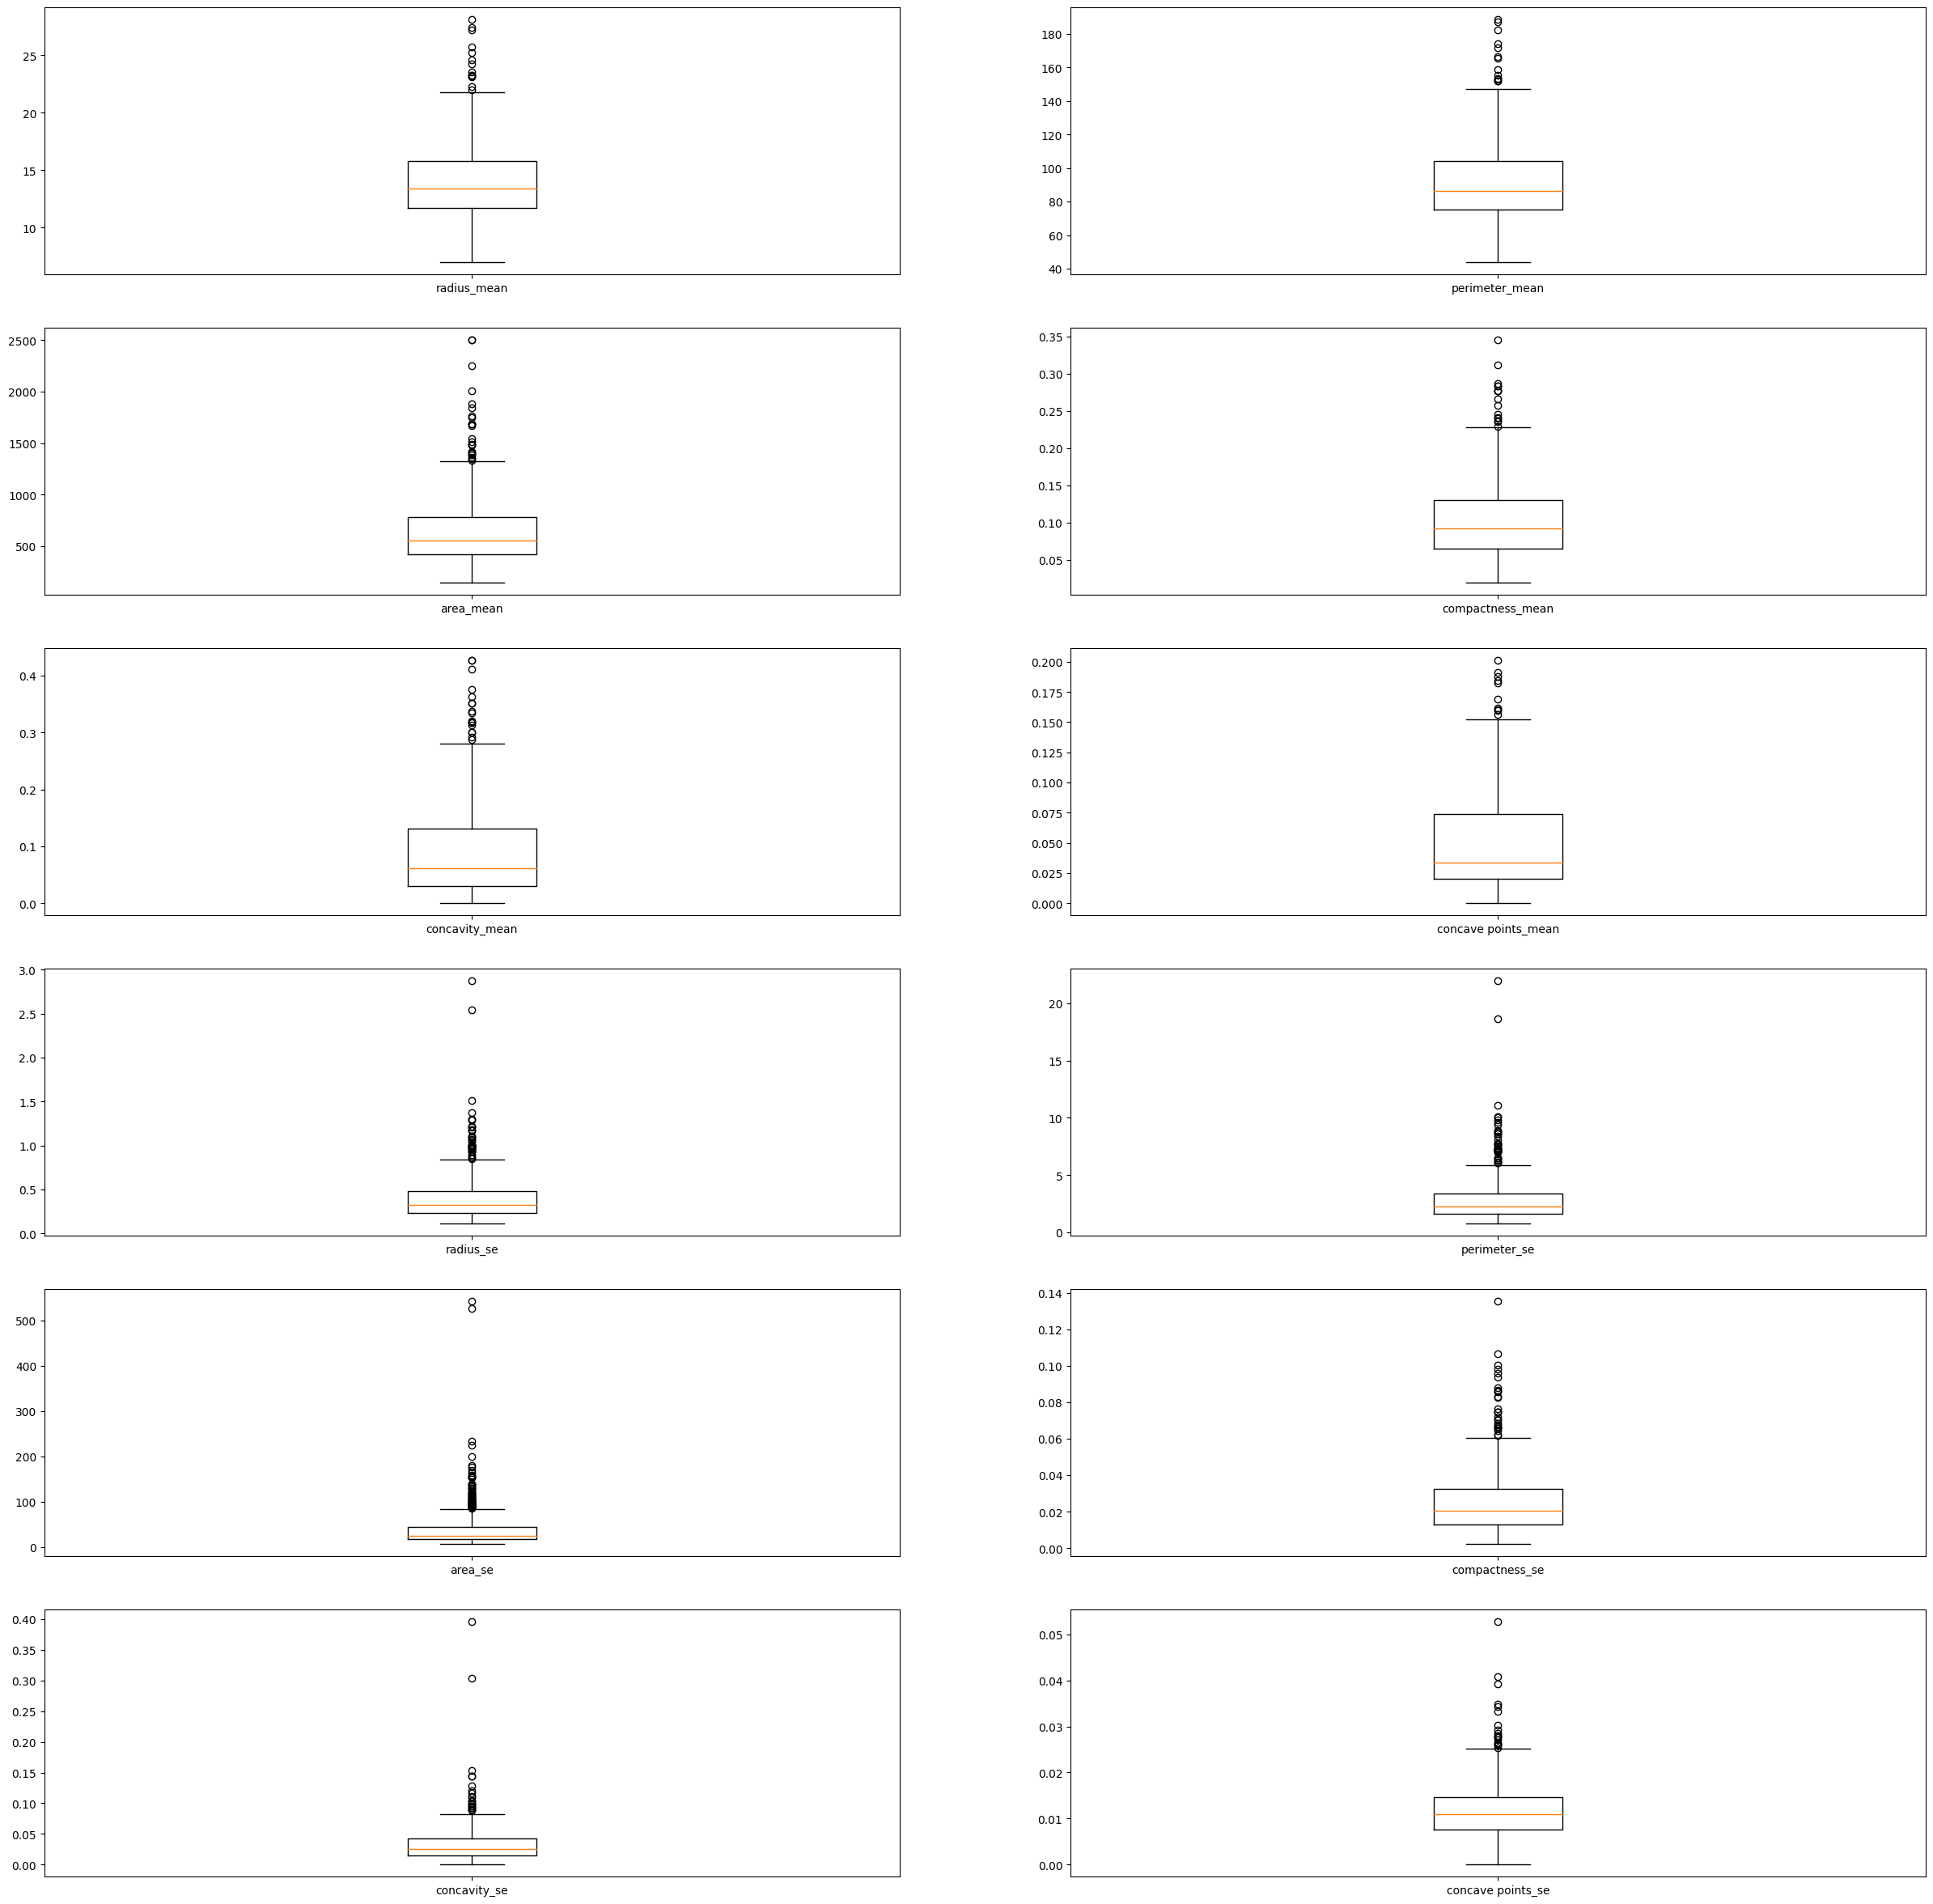

In [ ]:
num_cols = filtered_df.columns
fig, axes = plt.subplots(6,2, figsize=(30,30))
axes = axes.ravel()
for col, ax in zip(filtered_df[num_cols], axes):
  ax.boxplot(filtered_df[col].dropna(), labels=[f'{col}'])

In [ ]:
scale_cols = ['radius_mean', 'perimeter_se', 'radius_se', 'area_mean', 'perimeter_mean', 'area_se']

Con todo el análisis anterior, estamos listos para generar un modelo *baseline* denominado `logr_model`. Para ello:

5a) Vuelve a leer el contenido del archivo, haz que el `id` sea el índice y separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`diagnosis`). Divide el conjunto en entrenamiento y prueba (80:20) considerando el parámetro `random_state` con el valor de 1.

In [ ]:
df = pd.read_csv('data.csv')
df.set_index('id', inplace=True)

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en entrenamiento y prueba (80:20) con random_state=1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Verificar las formas de los conjuntos de entrenamiento y prueba
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (455, 30)
Forma de X_test: (114, 30)
Forma de y_train: (455,)
Forma de y_test: (114,)


In [ ]:
columns_to_drop = [col for col in X.columns if col not in columns_to_keep]

In [ ]:
len(columns_to_drop)

18

In [ ]:
columns_to_drop

['texture_mean',
 'smoothness_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'texture_se',
 'smoothness_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [ ]:
# Definir el transformador
preprocessing = ColumnTransformer(
    transformers=[
        ('drop_columns', 'drop', columns_to_drop)
    ],
    remainder='passthrough'
)

Entrenar el modelo `logr_model` con el transformador `preprocessing` y  regresión logística.

Como la salida `y` está en términos de las etiquetas `'B'` y `'M'`, en lugar de 0 y 1, para evaluar el modelo en el conjunto de prueba deberás especificar la clase positiva. En el caso de la matriz de confusión, indica el orden de las etiquetas con `labels=['B','M']`, porque `'B'` es la clase negativa (ésta se especifica primero) y `'M'` la positiva. Para las métricas de *recall* y *precision*, utiliza el parámetro `pos_label='M'`. Como *accuracy* ocupa la suma de ambas clases y el total de las observaciones, no requiere ninguna especificación. Si quisieras omitir estos parámetros, tendrías que sustituir `'B'` por 0 y `'M'` por 1, previo a la construcción del modelo.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
# Crear el modelo de regresión logística
logr_model = LogisticRegression(max_iter=10000, random_state=1)

# Crear el pipeline con el transformador y el clasificador
pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('logistic_regression', logr_model)
])

# Entrenar el modelo con los datos de entrenamiento
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_columns', 'drop',
                                                  ['texture_mean',
                                                   'smoothness_mean',
                                                   'symmetry_mean',
                                                   'fractal_dimension_mean',
                                                   'texture_se',
                                                   'smoothness_se',
                                                   'symmetry_se',
                                                   'fractal_dimension_se',
                                                   'radius_worst',
                                                   'texture_worst',
                                                   'perimeter_worst',
                                                   'area_worst',
                                                   'smoothness_worst',
                                                   'compactness_worst',
                                                   'concavity_worst',
                                                   'concave points_worst',
                                                   'symmetry_worst',
                                                   'fractal_dimension_worst'])])),
                ('logistic_regression',
                 LogisticRegression(max_iter=10000, random_state=1))])

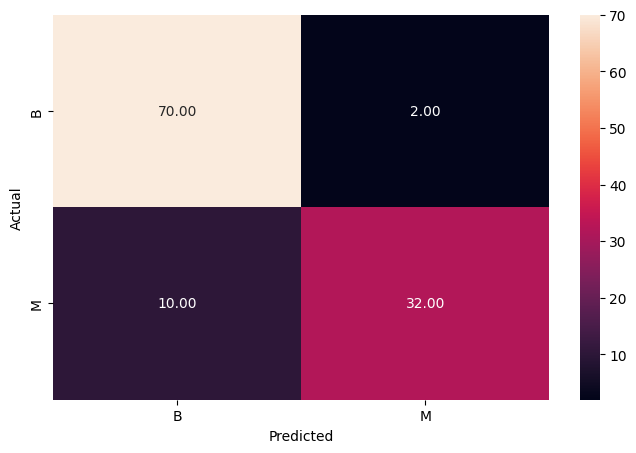

Recall: 0.7619047619047619
Precision: 0.9411764705882353
Acurracy: 0.8947368421052632


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
# Haciendo predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Evaluación del modelo
conf_matrix = confusion_matrix(y_test, y_pred, labels=['B', 'M'])
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
accuracy = accuracy_score(y_test, y_pred)

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, fmt='.2f', xticklabels=['B','M'], yticklabels=['B','M'])
plt.ylabel('Actual');
plt.xlabel('Predicted');
plt.show()

print('Recall:', recall)
print('Precision:', precision)
print('Acurracy:', accuracy)

Para generar un modelo `logr_model2` con transformación y escalamiento:
Modifica el transformador anterior para, además del borrado de las columnas correlacionadas, aplicar la raíz cuadrada a los predictores con sesgo (previamente almacenados en `skew_cols`) y escalamiento *MinMax* a los predictores con escala mayor a 1 (previamente almacenados en `scale_cols`) Como no todos los predictores serán eliminados o transformados, asegúrate de incluir el parámetro `remainder='passthrough'`

In [ ]:
def sqrt_transform(X):
    return np.sqrt(X)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
# Actualizar el transformador
preprocessing2 = ColumnTransformer(
    transformers=[
        ('drop_columns', 'drop', columns_to_drop),
        ('sqrt_transform', FunctionTransformer(func=sqrt_transform, validate=False), skew_cols),
        ('minmax_scale', MinMaxScaler(), scale_cols)
    ],
    remainder='passthrough'
)

# Crear el modelo de regresión logística
logr_model2 = LogisticRegression(random_state=1)

Entrena el modelo `logr_model2` con regresión logística, aplicando previamente el transformador modificado. Evalúa el modelo en el conjunto de prueba con las mismas métricas.

In [ ]:
# Crear el pipeline con el nuevo transformador y el clasificador
pipeline2 = Pipeline([
    ('preprocessing', preprocessing2),
    ('logistic_regression', logr_model2)
])

# Entrenar el nuevo modelo con los datos de entrenamiento
pipeline2.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_columns', 'drop',
                                                  ['texture_mean',
                                                   'smoothness_mean',
                                                   'symmetry_mean',
                                                   'fractal_dimension_mean',
                                                   'texture_se',
                                                   'smoothness_se',
                                                   'symmetry_se',
                                                   'fractal_dimension_se',
                                                   'radius_worst',
                                                   'texture_worst',
                                                   'perimeter_worst',
                                                   'area_worst',
                                                   'smoothness_worst',
                                                   'compactness_wor...
                                                  FunctionTransformer(func=<function sqrt_transform at 0x7ff44dd951b0>),
                                                  ['area_mean',
                                                   'compactness_mean',
                                                   'concavity_mean',
                                                   'concave points_mean',
                                                   'radius_se', 'perimeter_se',
                                                   'area_se', 'compactness_se',
                                                   'concavity_se',
                                                   'concave points_se']),
                                                 ('minmax_scale',
                                                  MinMaxScaler(),
                                                  ['radius_mean',
                                                   'perimeter_se', 'radius_se',
                                                   'area_mean',
                                                   'perimeter_mean',
                                                   'area_se'])])),
                ('logistic_regression', LogisticRegression(random_state=1))])

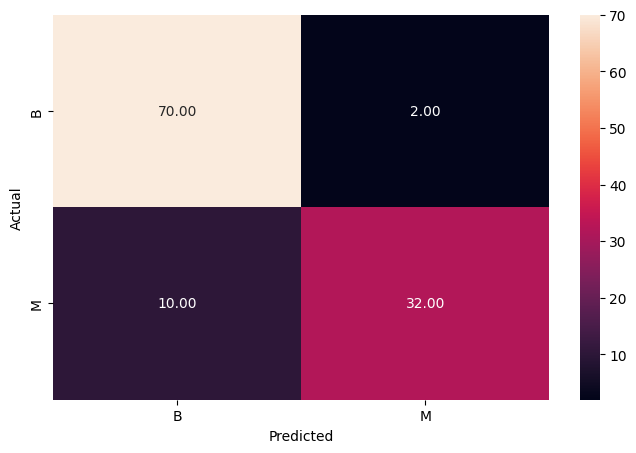

Recall: 0.7619047619047619
Precision: 0.9411764705882353
Acurracy: 0.8947368421052632


In [ ]:
# Haciendo predicciones en el conjunto de prueba
y_pred = pipeline2.predict(X_test)

# Evaluación del modelo
conf_matrix = confusion_matrix(y_test, y_pred, labels=['B', 'M'])
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
accuracy = accuracy_score(y_test, y_pred)

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, fmt='.2f', xticklabels=['B','M'], yticklabels=['B','M'])
plt.ylabel('Actual');
plt.xlabel('Predicted');
plt.show()

print('Recall:', recall)
print('Precision:', precision)
print('Acurracy:', accuracy)

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_scaled = scalar.fit_transform(X)
x_scaled[0:5]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

Aplica PCA al conjunto escalado y determina el número de componentes que explican el 99% de la varianza.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
x_projected = pca.fit_transform(x_scaled)
x_projected = pd.DataFrame(x_projected)
x_projected.head(5)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,...,0.096515,0.068850,0.084519,-0.175256,-0.151020,-0.201503,-0.252585,-0.033914,0.045648,-0.047169
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,...,-0.077327,-0.094578,-0.217718,0.011290,-0.170510,-0.041129,0.181270,0.032624,-0.005687,-0.001868
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,...,0.311067,-0.060309,-0.074291,0.102762,0.171158,0.004735,0.049569,0.047026,0.003146,0.000751
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,...,0.434193,-0.203266,-0.124105,0.153430,0.077496,-0.275225,0.183462,0.042484,-0.069295,-0.019937
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,...,-0.116545,-0.017650,0.139454,-0.005332,0.003062,0.039254,0.032168,-0.034786,0.005038,0.021214


In [ ]:
pca.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

In [ ]:
total_components = X.shape[1]

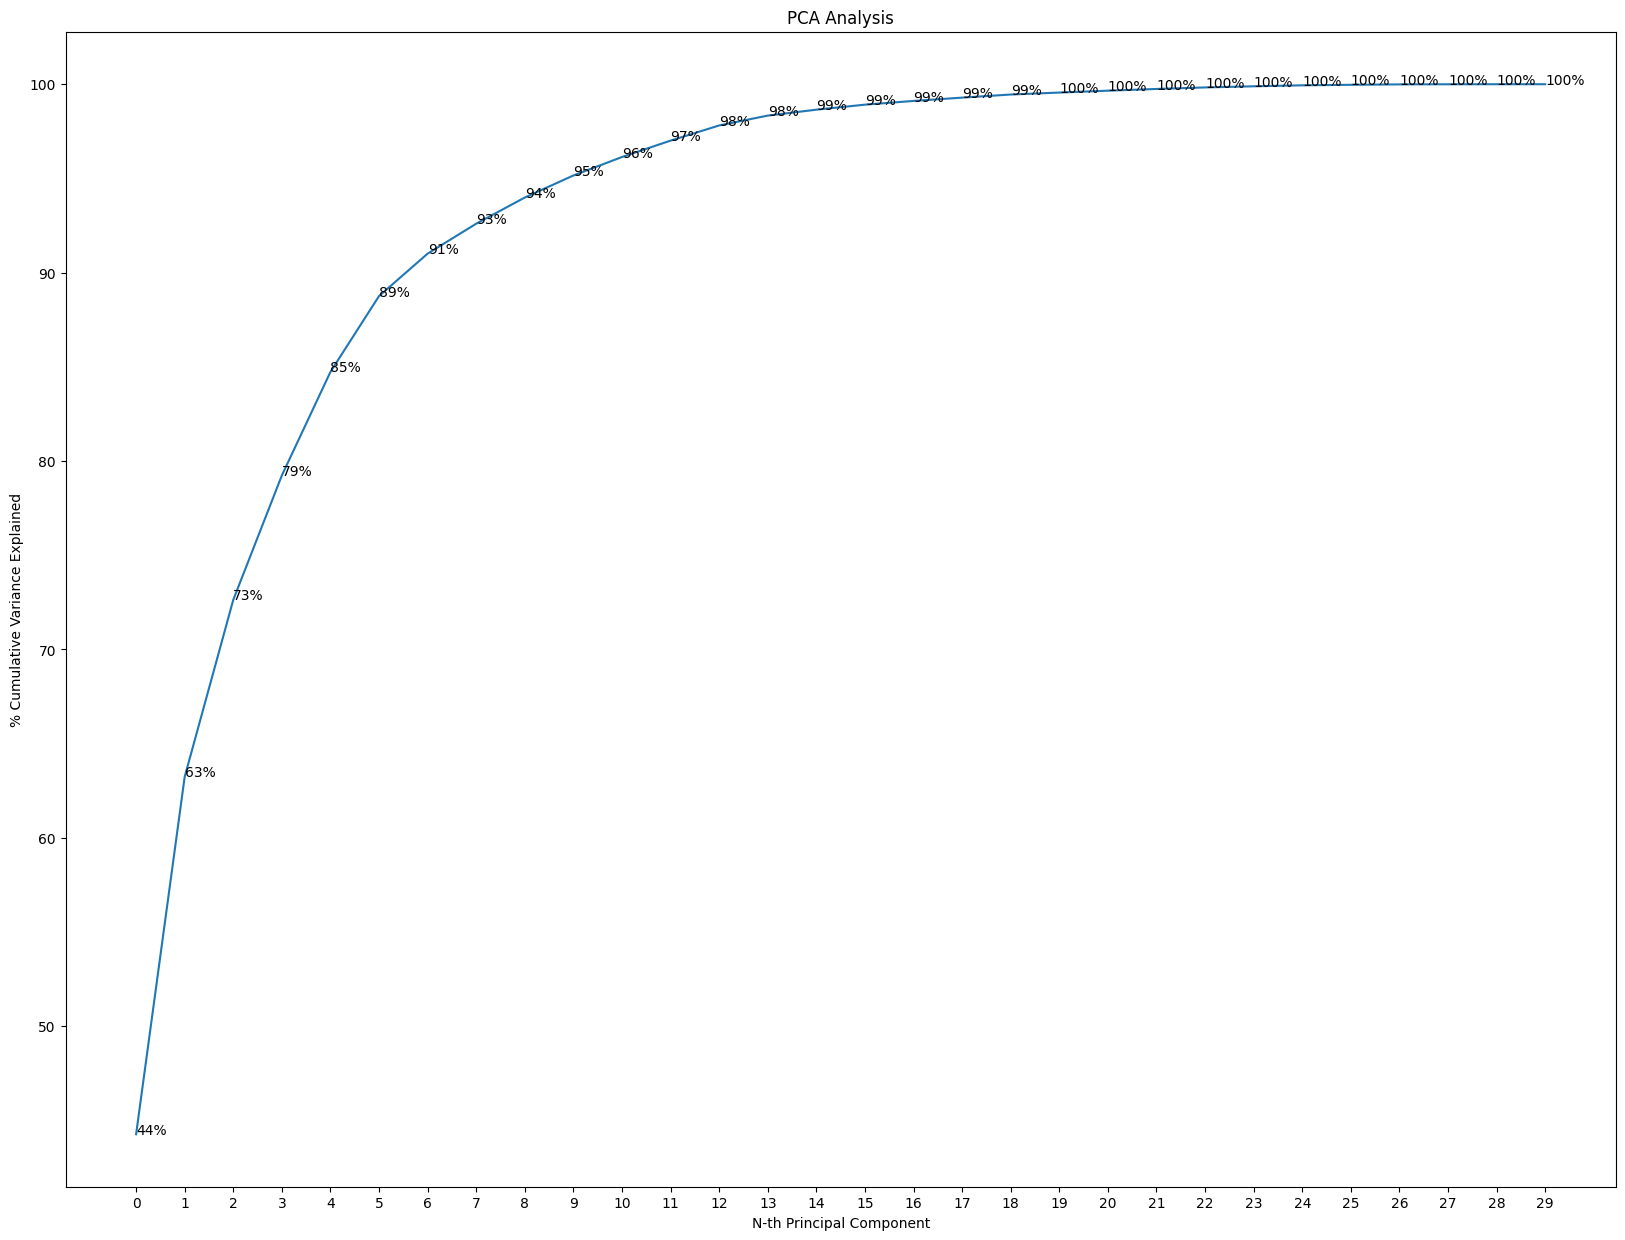

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.title('PCA Analysis')
plt.xlabel('N-th Principal Component')
plt.ylabel('% Cumulative Variance Explained')
plt.xticks(np.arange(0,total_components,1))
#ax = plt.axes()
#ax.xaxis.grid()

labels = np.cumsum(pca.explained_variance_ratio_)*100
for i in range(total_components):
  plt.text(i,labels[i],str(format(labels[i],'.0f'))+'%')

In [ ]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_components_99 = np.argmax(cumulative_variance_ratio >= 0.99) + 1

In [ ]:
num_components_99

17

Con el número de componentes determinado, estamos listos para generar un modelo `logr_model3` con PCA. Construye un pipeline que incluya el escalamiento estándar, el PCA con el número de componentes determinado y regresión logística. Entrena el modelo utilizando el  conjunto de entrenamiento y evalúalo en el conjunto de prueba con las mismas métricas.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Crear el objeto PCA con el número de componentes determinado
pca = PCA(n_components=num_components_99)

# Crear el modelo de regresión logística
logr_model3 = LogisticRegression(random_state=1)

# Crear el pipeline con el escalado estándar, PCA y regresión logística
pipeline3 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('logistic_regression', logr_model3)
])

# Entrenar el modelo con los datos de entrenamiento
pipeline3.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = pipeline3.predict(X_test)

# Evaluar el modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Imprimir métricas de evaluación
print(f'Accuracy en el conjunto de prueba: {accuracy:.4f}')
print('\nClassification Report en el conjunto de prueba:\n', classification_report_str)


Accuracy en el conjunto de prueba: 0.9737

Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           B       0.97      0.99      0.98        72
           M       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



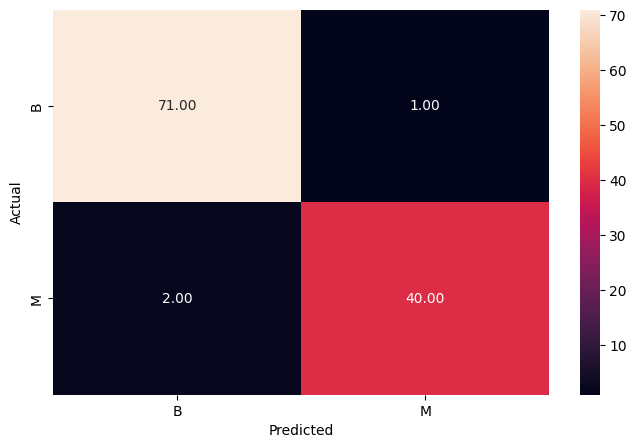

Recall: 0.9523809523809523
Precision: 0.975609756097561
Acurracy: 0.9736842105263158


In [ ]:
# Evaluación del modelo
conf_matrix = confusion_matrix(y_test, y_pred, labels=['B', 'M'])
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
accuracy = accuracy_score(y_test, y_pred)

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, fmt='.2f', xticklabels=['B','M'], yticklabels=['B','M'])
plt.ylabel('Actual');
plt.xlabel('Predicted');
plt.show()

print('Recall:', recall)
print('Precision:', precision)
print('Acurracy:', accuracy)

 En un modelo de diagnóstico médico, ¿cuál consideras que es la métrica más importante? ¿Cómo cambiarías (disminuir/aumentar) el *threshold*? ¿Por qué?


En un modelo de diagnóstico médico:

* Métrica más importante: Sensibilidad (Recall) es crucial, ya que minimiza los falsos negativos, identificando correctamente casos positivos.


Threshold:
* Disminuir: Aumenta la sensibilidad, útil para reducir falsos negativos.
* Aumentar: Aumenta la especificidad, útil para reducir falsos positivos.


La elección del threshold es un equilibrio entre sensibilidad y especificidad, dependiendo de las consecuencias clínicas asociadas con los errores del modelo. La colaboración con profesionales de la salud es esencial para determinar el umbral óptimo.